In [123]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
warnings.filterwarnings('ignore')
df=pd.read_csv('SpaData.csv')
correlation=df.corr()
correlation['GTOccupancy'].sort_values(ascending=False)
df.drop('ID', axis=1, inplace=True)
df.reset_index(drop=True)
df.TimeStamp= pd.to_datetime(df.TimeStamp)
df['Year'],df['Month'],df['Day'],df['Hours'],df['Minuts']=np.nan,np.nan,np.nan,np.nan,np.nan
for i in range(len(df)):
    df['Year'][i]=df['TimeStamp'][i].year
    df['Month'][i]=df['TimeStamp'][i].month
    df['Day'][i]=df['TimeStamp'][i].day
    df['Hours'][i]=df['TimeStamp'][i].hour
    df['Minuts'][i]=df['TimeStamp'][i].minute
training_df=df.drop(['GTOccupancy', 'TimeStamp'], axis=1)
target=df.GTOccupancy
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,KFold
x_train,x_test,y_train,y_test=train_test_split(training_df,target,test_size=.30,stratify=target,random_state=31)
model=KNeighborsClassifier(leaf_size=45, metric='manhattan', n_neighbors=15, p=10,weights='distance')
model.fit(x_train,y_train)
pred=model.predict(x_test)
print(accuracy_score(pred,y_test))


0.9923273657289002


In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv("winequality-red.csv")
#sns.heatmap(df.corr(),annot=True)
def reduce_skewness(dataframe):
    for i in range(len(dataframe.columns)):
        if dataframe[dataframe.columns[i]].skew()>0:
            dataframe[dataframe.columns[i]]=dataframe[dataframe.columns[i]].map(lambda i: np.log(i) if i > 0 else 0) 
        else:
            continue

    return dataframe
new_df=reduce_skewness(df.drop(['quality'],1))
def generate_target(df,column_name):
    for i in range(len(df)):
        if df[column_name][i]==6:
            df[column_name][i]="normal"
        elif df[column_name][i]>6:
            df[column_name][i]="good"
        else:
            df[column_name][i]="poor"
    return df
            
new_df=generate_target(df,'quality')
new_df['quality']=LabelEncoder().fit_transform(new_df.quality)
from sklearn.ensemble import ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score
X=new_df.iloc[:,:-1]
y=new_df.quality
x_train,x_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=.32,random_state=80)
model=RandomForestClassifier(n_estimators=180,max_depth=15)

model.fit(x_train,y_train)
#pd.Series(model.feature_importances_,index=X.columns).value_counts().plot(kind="barh")
pred=model.predict(x_test)

print(accuracy_score(y_test,pred))

In [113]:
cv=KFold(n_splits=2)
grid_model=RandomizedSearchCV(KNeighborsClassifier(),cv=cv,param_distributions=grid,n_iter=20)

In [114]:
grid_model.fit(x_train,y_train)

RandomizedSearchCV(cv=KFold(n_splits=2, random_state=None, shuffle=False),
                   estimator=KNeighborsClassifier(), n_iter=20,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [30, 35, 40, 45, 50, 55,
                                                      60, 65, 70],
                                        'metric': ['minkowski', 'euclidean',
                                                   'manhattan'],
                                        'n_neighbors': [5, 8, 10, 13, 15, 18,
                                                        20, 22, 24],
                                        'p': [2, 4, 6, 8, 10, 12],
                                        'weights': ['uniform', 'distance']})

In [115]:
grid_model.best_estimator_

KNeighborsClassifier(leaf_size=45, metric='manhattan', n_neighbors=15, p=8,
                     weights='distance')

In [116]:
model=KNeighborsClassifier(leaf_size=45, metric='manhattan', n_neighbors=15, p=8,
                     weights='distance')
model.fit(x_train,y_train)
pred=model.predict(x_test)
print(accuracy_score(pred,y_test))


0.9943734015345268


In [118]:
print (f'Train Accuracy - : {model.score(x_train, y_train):.3f}')
print (f'Test Accuracy - : {model.score(x_test, y_test):.3f}')

Train Accuracy - : 1.000
Test Accuracy - : 0.994


In [119]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1533
           1       0.99      0.98      0.99       422

    accuracy                           0.99      1955
   macro avg       0.99      0.99      0.99      1955
weighted avg       0.99      0.99      0.99      1955



0.9923273657289002

In [75]:
confusion_matrix(pred,y_test)

array([[1528,    5],
       [  10,  412]], dtype=int64)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1533
           1       0.99      0.98      0.98       422

    accuracy                           0.99      1955
   macro avg       0.99      0.99      0.99      1955
weighted avg       0.99      0.99      0.99      1955



In [54]:
#training_data_df=training_df[:4000]
#testing_data_df=training_df[4000:]

In [55]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scale=MinMaxScaler()
scaled_training_data=scale.fit_transform(training_df)
scaled_training_data

array([[0.44019139, 0.13251121, 0.28001725, 0.13430296, 0.08570667],
       [0.06937799, 0.4529148 , 0.        , 0.03295683, 0.27403005],
       [0.23923445, 0.08565022, 0.        , 0.01408015, 0.00582895],
       ...,
       [0.14354067, 0.52959641, 0.        , 0.01377069, 0.35696178],
       [0.18181818, 0.10941704, 0.        , 0.02326061, 0.01519825],
       [0.28708134, 0.72959641, 0.        , 0.01892826, 0.57041137]])

In [14]:
training_data_df=scaled_training_data[:6000]
testing_data_df=scaled_training_data[6000:]

In [15]:
len(training_data_df),len(testing_data_df)


(6000, 514)

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier()

## Hyper parameter tuning 

In [17]:
#no. of random trees to be formed
n_estimators=[int(x) for x in np.linspace(start=10, stop=500, num=5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [2,5]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [18]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 132, 255, 377, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [2, 5], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [24]:
rf_clf=KNeighborsClassifier()

In [56]:
rf_clf.fit(training_data_df, training_target_df)

KNeighborsClassifier()

In [57]:
    print (f'Train Accuracy - : {rf_clf.score(training_data_df, training_target_df):.3f}')
    print (f'Test Accuracy - : {rf_clf.score(testing_data_df, testing_target_df):.3f}')

Train Accuracy - : 0.995
Test Accuracy - : 0.986


In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
cnf_mat=confusion_matrix(testing_target_df, predicted)

NameError: name 'predicted' is not defined

In [44]:
cnf_mat

array([[411,   6],
       [  1,  96]], dtype=int64)

Text(69.0, 0.5, 'Truth')

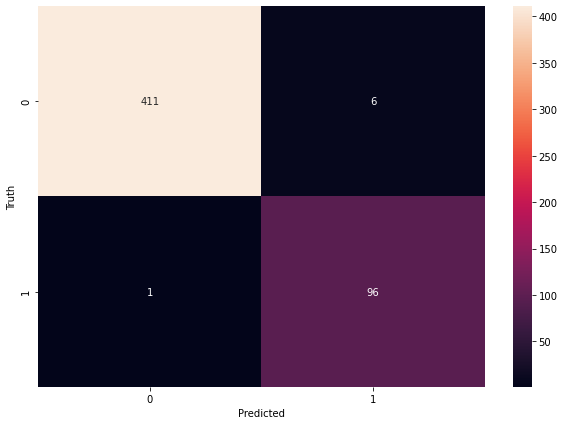

In [45]:
import tensorflow as tf
import seaborn as sn
cm = tf.math.confusion_matrix(labels=testing_target_df,predictions=predicted)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [48]:
f1_score=cnf_mat[1,1]/(cnf_mat[1,1] + ((cnf_mat[0,1]+cnf_mat[1,0])/2)) #manual calculation to find f1 score 
f1_score

0.964824120603015

In [53]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision=precision_score(testing_target_df, predicted)
recall=recall_score(testing_target_df, predicted)
f1=f1_score(testing_target_df, predicted)
precision,recall,f1

(0.9411764705882353, 0.9896907216494846, 0.964824120603015)